In [1]:
# dependencies
import pandas as me
import matplotlib.pyplot as plt

from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

In [36]:
# set background and opactiy for graphs
plt.rcParams.update({
    "figure.facecolor":  (1.0, 1.0, 1.0, 1.0),  # white with alpha = 100%
    "axes.facecolor":    (1.0, 1.0, 1.0, 1.0),  # white with alpha = 100%
    "savefig.facecolor": (1.0, 1.0, 1.0, 1.0),  # white with alpha = 100%
})

#### Prepare the Data

In [2]:
# read myopia.csv into a Pandas DataFrame
file_path = Path('resources/myopia.csv')
df_myopia = me.read_csv(file_path)
df_myopia.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
# list dataframe data types
df_myopia.dtypes

AGE            int64
SPHEQ        float64
AL           float64
ACD          float64
LT           float64
VCD          float64
SPORTHR        int64
READHR         int64
COMPHR         int64
STUDYHR        int64
TVHR           int64
DIOPTERHR      int64
MOMMY          int64
DADMY          int64
MYOPIC         int64
dtype: object

In [4]:
# DataFrame shape of features
labels = df_myopia['MYOPIC']
df_myopia.shape

(618, 15)

In [5]:
# find any existing null values in each column and display
for column in df_myopia.columns:
    print(f'Column {column} has {df_myopia[column].isnull().sum()} null values')

# find duplicate row entries
print(f'\nDuplicate row entries: {df_myopia.duplicated().sum()}')

Column AGE has 0 null values
Column SPHEQ has 0 null values
Column AL has 0 null values
Column ACD has 0 null values
Column LT has 0 null values
Column VCD has 0 null values
Column SPORTHR has 0 null values
Column READHR has 0 null values
Column COMPHR has 0 null values
Column STUDYHR has 0 null values
Column TVHR has 0 null values
Column DIOPTERHR has 0 null values
Column MOMMY has 0 null values
Column DADMY has 0 null values
Column MYOPIC has 0 null values

Duplicate row entries: 0


In [6]:
# statistical summary
df_myopia.describe()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
count,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000
mean,6.299353,0.801010,22.496780,3.578629,3.541453,15.376780,11.953074,2.796117,2.105178,1.490291,8.948220,26.017799,0.506472,0.498382,0.131068
std,0.712950,0.625918,0.680141,0.230394,0.154519,0.664183,7.968296,3.068191,3.056508,2.216207,5.719021,16.031715,0.500363,0.500402,0.337748
min,5.000000,-0.699000,19.900000,2.772000,2.960000,13.380000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000
25%,6.000000,0.456250,22.040001,3.424000,3.436000,14.930000,6.000000,0.000000,0.000000,0.000000,4.250000,15.000000,0.000000,0.000000,0.000000
50%,6.000000,0.729000,22.464999,3.585000,3.542000,15.360000,10.000000,2.000000,1.000000,1.000000,8.000000,23.000000,1.000000,0.000000,0.000000
75%,6.000000,1.034000,22.969999,3.730000,3.640000,15.840000,16.000000,4.000000,3.000000,2.000000,12.000000,34.000000,1.000000,1.000000,0.000000
max,9.000000,4.372000,24.559999,4.250000,4.112000,17.299999,45.000000,20.000000,30.000000,15.000000,31.000000,101.000000,1.000000,1.000000,1.000000


In [7]:
# remove the 'MYOPIC' column from the dataset (prevents bias)
df_myopia = df_myopia.drop('MYOPIC', axis = 1)

# save a new csv file of the cleaned dataframe for future use
file_path = Path('resources/cleaned_myopia.csv')
df_myopia.to_csv(file_path, index = False)

In [8]:
# scale the dataset so that columns containing larger values do not influence the outcome more than columns with smaller values
scaler = StandardScaler()
myo_scaled = scaler.fit_transform(df_myopia)
myo_scaled[0]

array([-0.42021911, -1.3639169 , -0.89286146,  0.48378402, -0.28144315,
       -1.0197916 ,  4.1506609 ,  1.69744958, -0.68931054, -0.67299591,
        0.18405806,  0.49830393,  0.98713773,  1.0032415 ])

#### Apply Dimension Reduction

In [9]:
# dimensionalty reduction (dred) with PCA
  
# initialize PCA model preserving 90% of the explained variance in the dred
pca = PCA(n_components = 0.9)

# get the principle components for the myopia data
myopia_pca = pca.fit_transform(myo_scaled)

# get the explained variance ratio
pca.explained_variance_ratio_.sum()

0.9187361702915187

In [10]:
# features reduced from 15 to 10 after reduction
myopia_pca.shape

(618, 10)

In [11]:
# further reduce the dataset dimensions with t_SNE

# initialize the t_SNE model
tsne = TSNE(learning_rate=250, n_components=3, perplexity=50, verbose=1, n_iter=2500)

# reduce dimensions
tsne_features = tsne.fit_transform(myopia_pca)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 618 samples in 0.002s...
[t-SNE] Computed neighbors for 618 samples in 0.039s...
[t-SNE] Computed conditional probabilities for sample 618 / 618
[t-SNE] Mean sigma: 1.438866
[t-SNE] KL divergence after 250 iterations with early exaggeration: 102.501373
[t-SNE] KL divergence after 2500 iterations: 2.172731


In [12]:
# shape of features after tSNE reduction
tsne_features.shape

(618, 3)

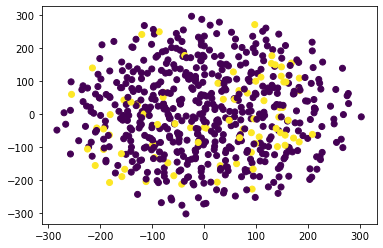

In [37]:
# create a scatter plot of the t-SNE output
plt.scatter(tsne_features[:,0],tsne_features[:,1],c=labels)
plt.show()


#### K-means Cluster Analysis

In [14]:
# create an elbow plot to identify the best number of clusters

# use a for loop to determine the inertia for each k between 1 through 10
inertia = []
k = list(range(1, 11))

# calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(myopia_pca)
    inertia.append(km.inertia_)

elbow_data = {'k': k, 'inertia': inertia}
elbow_df = me.DataFrame(elbow_data)
elbow_df.head()

,k,inertia
0,1,7948.905345
1,2,6794.415695
2,3,6031.097742
3,4,5662.587617
4,5,5376.410589


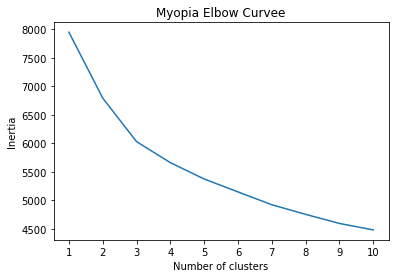

In [38]:
# plot the elbow curve to find the best candidate(s) for k
plt.plot(elbow_df['k'], elbow_df['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Myopia Elbow Curvee')
plt.show()

# The elbow is at k=3

In [16]:
# create a DataFrame from the pca transformed data for k-means modelling and plotting
columns=[]
for i in range(len(pca.components_)):
    columns.append(i+1)
pca_df = me.DataFrame(myopia_pca, columns=columns)
pca_df['class']= km.labels_
pca_df.head()

,1,2,3,4,5,6,7,8,9,10,class
0,0.535503,1.145004,-1.385019,0.116006,-3.226691,-1.928459,-1.958892,-1.922997,0.026753,0.178144,6
1,-0.624706,-1.575786,-0.794253,1.156287,0.292256,0.349060,-0.455206,0.285332,0.689683,-0.557031,2
2,-0.933479,-0.717076,0.820150,-1.547638,0.173941,0.272783,0.025821,-0.030817,-0.431499,0.013336,8
3,0.106354,1.192475,-0.024441,1.507469,-2.356836,-0.023139,0.236418,-1.717109,-1.230785,-0.703400,6
4,-0.388503,-2.839655,-0.229767,-0.622510,0.271458,-0.928956,0.537900,-1.301787,0.279007,0.631183,2


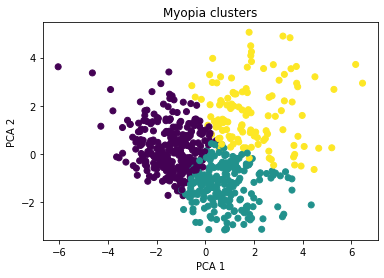

In [39]:
# initialize the k-means model with n_clusters 3
model = KMeans(n_clusters=3, random_state=0)

# train the model
model.fit(pca_df)

# predict clusters
predictions = model.predict(pca_df)

# add predicted clusters to the DataFrame
pca_df['class'] = model.labels_

# plot the clusters
plt.scatter(x=pca_df[1], y=pca_df[2], c=pca_df['class'])
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Myopia clusters')
plt.show()


#### Findings and Recommendation

##### Myopia Cluster Findings
The following observations are for myopia clusters after data preparation, reduction, and cluster analysis:
* The optimal number of clusters appears to be 3, therefore patients can be clustered in 3 groups.
* Some clear clusters formed after performing K-Means, however accuracy would benefit from a largest dataset as well as additional testing and training using the above models since the clusters have some scattering.
